<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/TallerParcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan las librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Modelo Naive Bayes
from  sklearn.naive_bayes import GaussianNB

#Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

#Modelo KNN y KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#Métricas para evaluar los modelos
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve

#Gráficador - DashBoards
import seaborn as sns

Mounted at /content/drive


1. Se carga la base de datos

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


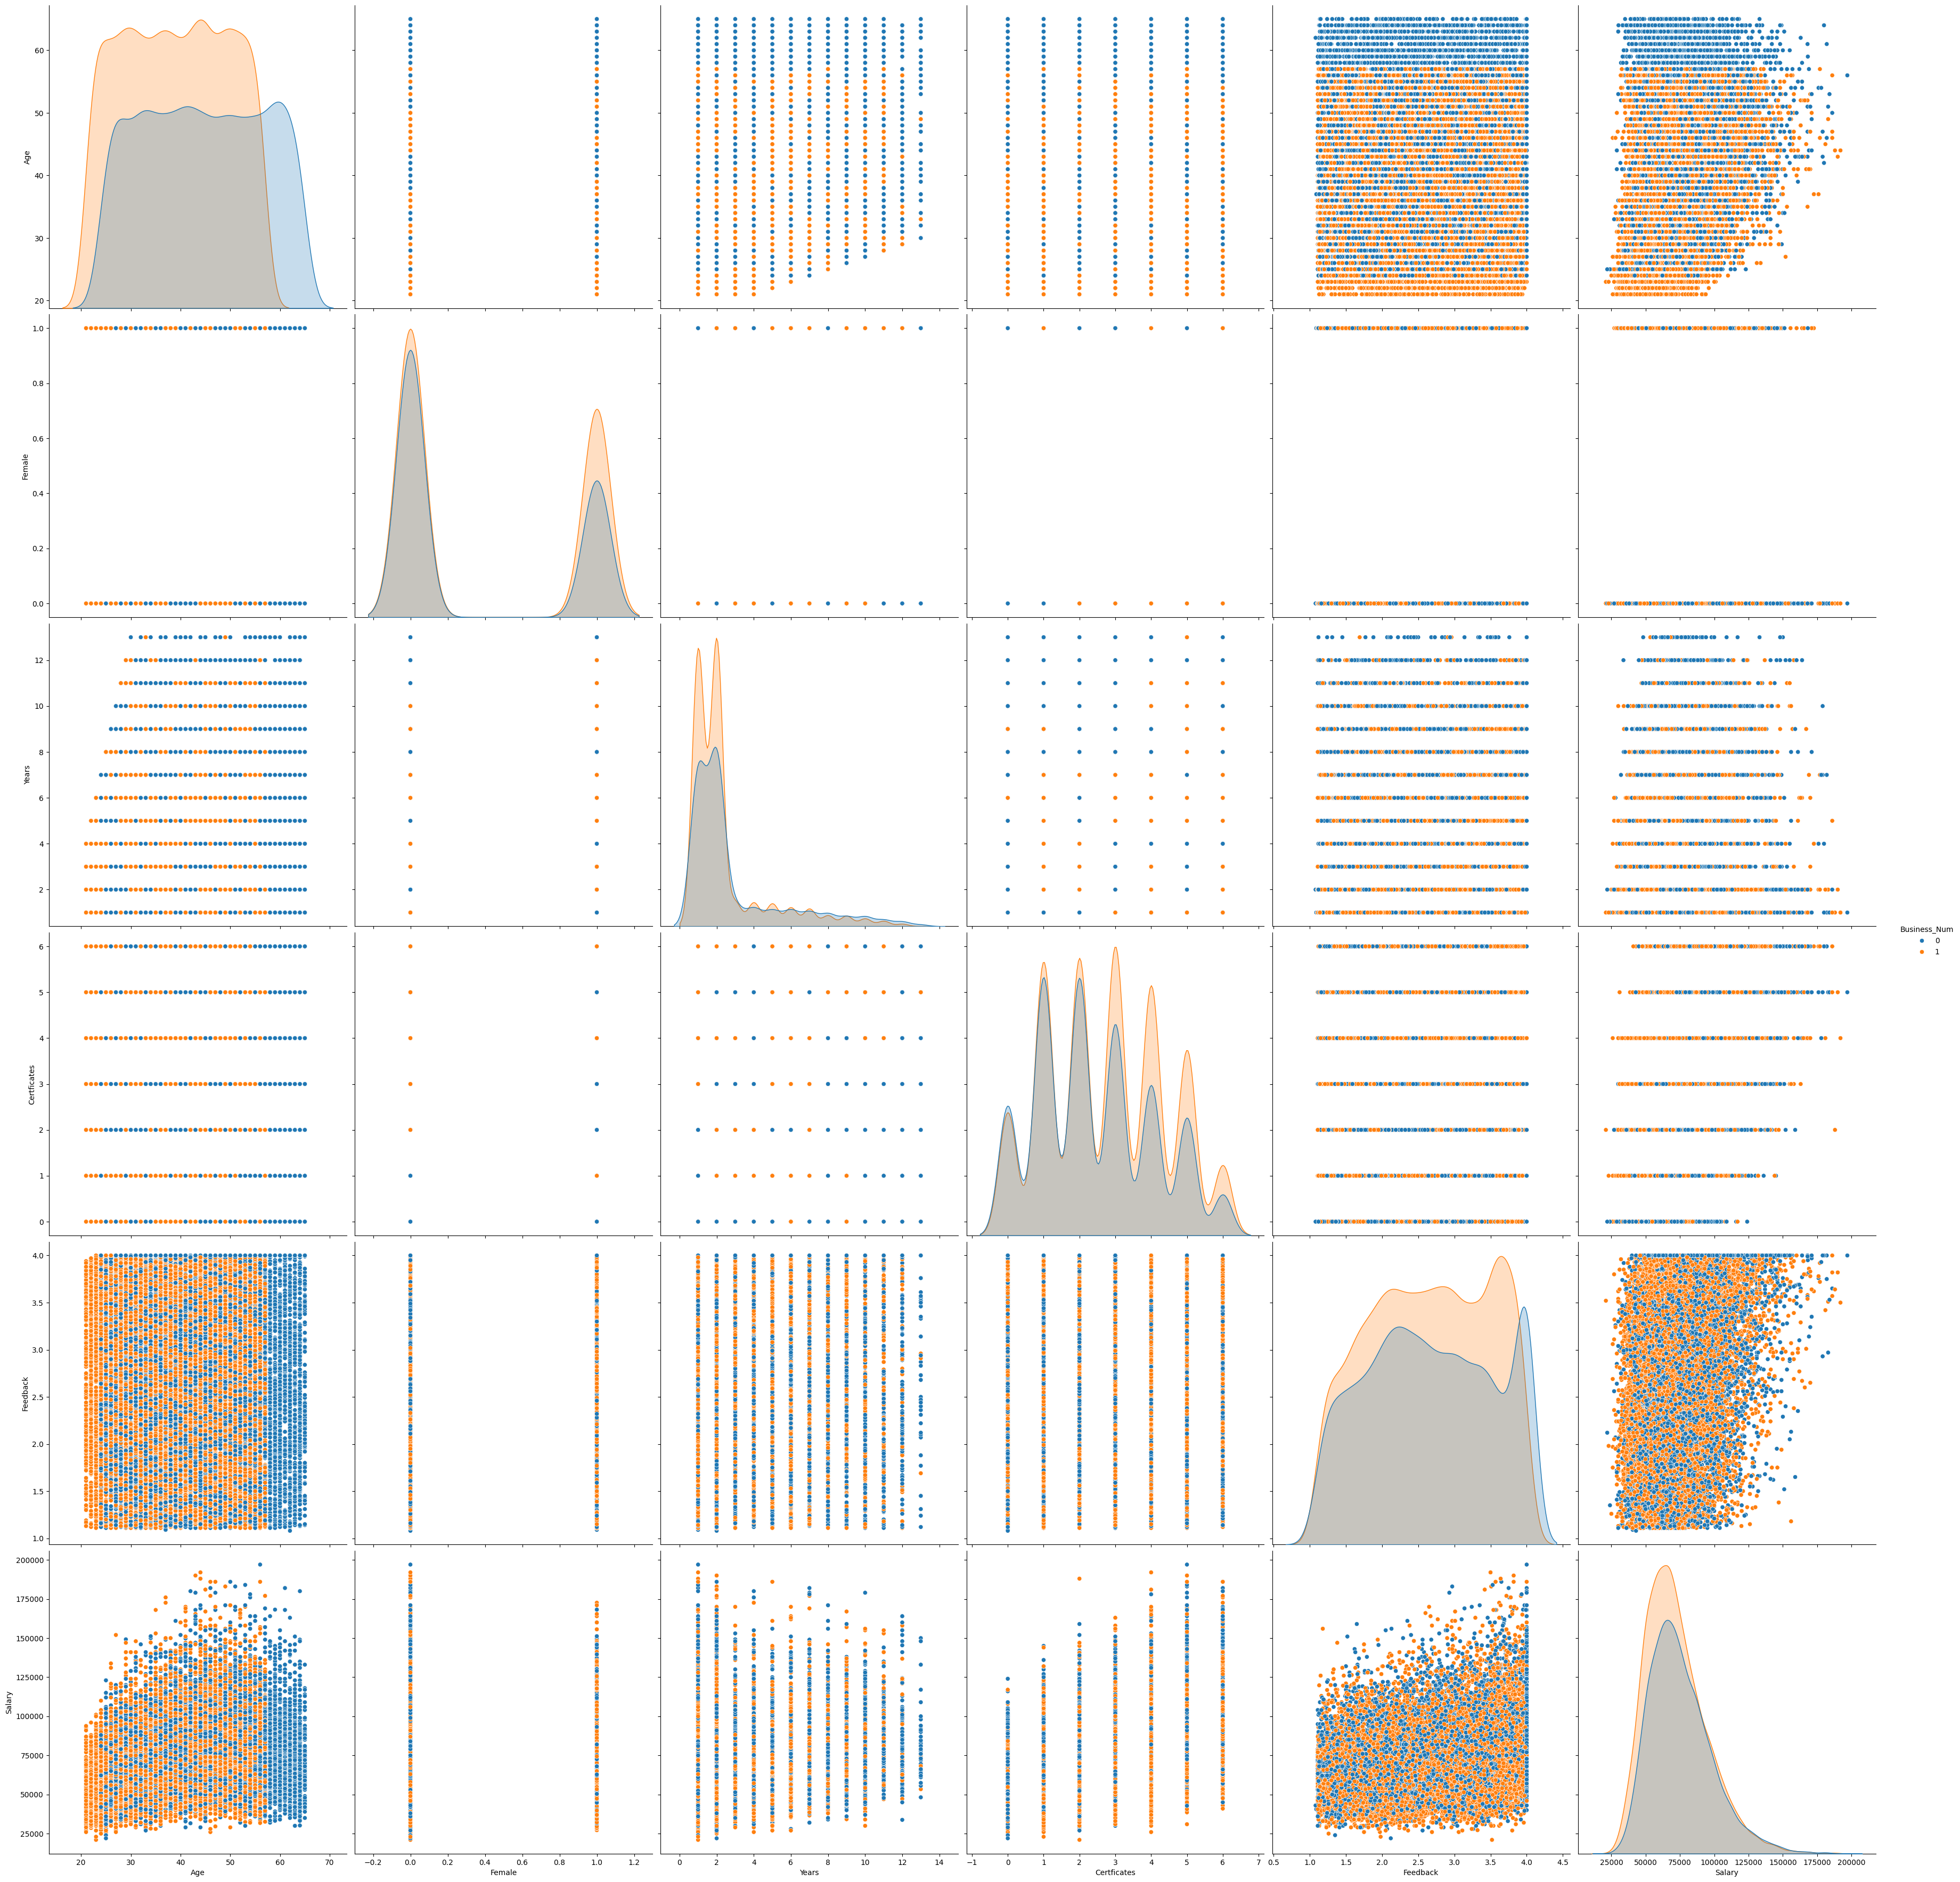

In [ ]:
nxl='/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/4. Taller Parcial 1 - Tech_Sales_Rep.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()

#Se crea el DashBoard
sns.pairplot(XDB, hue='Business_Num',size=6,vars=['Age','Female','Years','Certficates','Feedback','Salary'])

Business_Num
0     9860
1    12130
dtype: int64


<ipython-input-3-2d30e7922f0a>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  XDB.drop(['Business_Num'],1).hist()


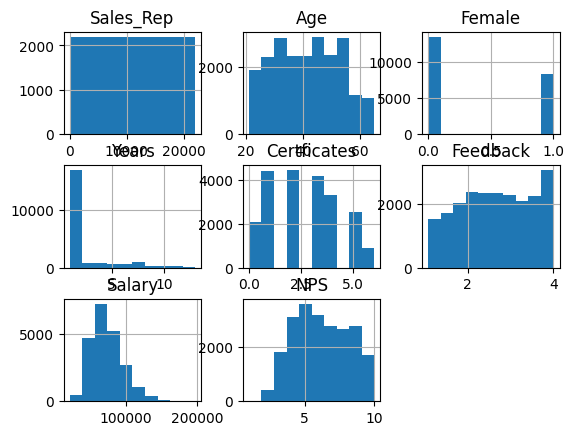

In [ ]:
#Datos de Entrada - Datos de Salida
XD=np.array(XDB[['Age','Female','Years','Certficates','Feedback','Salary']])
yd=np.array(XDB[['Business_Num']])

#Se procede con la inspección de las variables
print(XDB.groupby('Business_Num').size())
XDB.drop(['Business_Num'],1).hist()
plt.show()

In [ ]:
#Se procede con la correlación entre las variables
dfinf=pd.DataFrame(np.column_stack((XD[:,0],XD[:,1],XD[:,2],XD[:,3],XD[:,4],XD[:,5],yd)))
dfinf.columns=['Age','Female','Years','Certficates','Feedback','Salary','Business Num']
dfinf.corr()

dfcorrel=pd.DataFrame(dfinf.corr())
dfcorrel.to_excel('InformeCorrel.xlsx')

Age    Female     Years  Certficates  Feedback    Salary  \
Age           1.000000 -0.018215  0.057280    -0.022949  0.000305  0.263914   
Female       -0.018215  1.000000 -0.007821     0.002982  0.012601 -0.162976   
Years         0.057280 -0.007821  1.000000    -0.008271  0.001754  0.093080   
Certficates  -0.022949  0.002982 -0.008271     1.000000 -0.004496  0.458440   
Feedback      0.000305  0.012601  0.001754    -0.004496  1.000000  0.312452   
Salary        0.263914 -0.162976  0.093080     0.458440  0.312452  1.000000   
Business Num -0.242106  0.082904 -0.101416     0.094987 -0.014701 -0.072924   

              Business Num  
Age              -0.242106  
Female            0.082904  
Years            -0.101416  
Certficates       0.094987  
Feedback         -0.014701  
Salary           -0.072924  
Business Num      1.000000

2. Modelo Naive Bayes

In [ ]:
mnb=GaussianNB()
mnb.fit(XD,yd)

#Se evalua el modelo
ymnb=mnb.predict (XD)
cmnb=confusion_matrix(yd,ymnb)

#Se procede con la presentación de las métricas
VP=cmnb[0,0];FN=cmnb[0,1]
FP=cmnb[1,0];VN=cmnb[1,1]
#0. Comportamiento general del modelo (Exactitud)
print("La exactitud es: ",(VP+VN)/(VP+FN+FP+VN))
#1. El coeficiente de Especificidad (Como se comportó el modelo pronosticando los negativos)
print("Especificidad: ",VN/(VN+FP))


La exactitud es:  0.6280582082764893
Especificidad:  0.7788128606760099


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Media de las variables
u=mnb.theta_
print("Las medias de las variables son:",u)

Las medias de las variables son: [[4.45608519e+01 3.38336714e-01 2.92018256e+00 2.43853955e+00
  2.67816836e+00 7.55154564e+04]
 [3.90046167e+01 4.19373454e-01 2.42382523e+00 2.75333883e+00
  2.65343446e+00 7.21767519e+04]]


3. Modelo Árbol de Decisión

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4)
mar.fit(XD,yd)

#Se evalua el modelo
ymar=mar.predict(XD)
cmar=confusion_matrix(yd,ymar)

#Se procede con la presentación de las métricas
VP=cmar[0,0];FN=cmar[0,1]
FP=cmar[1,0];VN=cmar[1,1]
#0. Comportamiento general del modelo (Exactitud)
print("La exactitud es: ",(VP+VN)/(VP+FN+FP+VN))
#1. El coeficiente de Especificidad (Como se comportó el modelo pronosticando los negativos)
print("Especificidad: ",VN/(VN+FP))

La exactitud es:  0.6714415643474306
Especificidad:  0.9948062654575432


In [ ]:
#Elaboración del modelo
vs=['Age','Female','Years','Certficates','Feedback','Salary'] #Titulos Árbol
dot_data=export_graphviz(mar,feature_names=vs) #Coloque los nombres al árbol
graph=graph_from_dot_data(dot_data) #Creeme el gráfico
graph.write_png('Arbol_Parcial.png')

True

In [ ]:
ydmar=mar.predict(XD)

#Informe
dfn=pd.DataFrame(np.column_stack((XD,ydmar)))
dfn.columns=['Age','Female','Years','Certficates','Feedback','Salary','Industria']
dfn.to_excel("InformeIndustrias.xlsx")

#Pronóstico
h= sum(dfn['Industria']==0)
s= sum(dfn['Industria']==1)
dfni=pd.DataFrame({'Tipo de Negocio':['Hardware','Software'],
                                      '# Personas':[h,s]})
dfni.to_excel('Informe#Personas.xlsx')

Tipo de Negocio  # Personas
0        Hardware        2761
1        Software       19229

4. Modelo KNN

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)
yknn=mknn.predict(XD)

#Se evalua el modelo
cmknn=confusion_matrix(yd,yknn)

#Se procede con la presentación de las métricas
VP=cmknn[0,0];FN=cmknn[0,1]
FP=cmknn[1,0];VN=cmknn[1,1]
#0. Comportamiento general del modelo (Exactitud)
print("La exactitud es: ",(VP+VN)/(VP+FN+FP+VN))
#1. El coeficiente de Especificidad (Como se comportó el modelo pronosticando los negativos)
print("Especificidad: ",VN/(VN+FP))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


La exactitud es:  0.692905866302865
Especificidad:  0.7342951360263809


5. Modelo KMeans

In [ ]:
np.random.seed(42)
k=5

mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)


labels=mkm.labels_
centroids=mkm.cluster_centers_

print("La conformación de los centroides es:\n",centroids)

#Se analiza a una persona
XDi=np.array([(26,1,5,5,3,55000)])
ydk=mkm.predict(XDi)
print("La persona analizada pertenece al cluster:",ydk)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


La conformación de los centroides es:
 [[4.70372566e+01 1.57493649e-01 3.21507197e+00 4.26333616e+00
  3.27462320e+00 1.30744962e+05]
 [4.06066877e+01 4.43544759e-01 2.58269606e+00 2.28055181e+00
  2.51719298e+00 6.27592443e+04]
 [4.46677232e+01 2.77865821e-01 2.84838880e+00 3.50950872e+00
  2.98699155e+00 9.91170629e+04]
 [3.66305987e+01 4.57427938e-01 2.31995565e+00 1.62283814e+00
  2.35859424e+00 4.68180488e+04]
 [4.30908624e+01 3.70294319e-01 2.72518823e+00 2.83915127e+00
  2.73655031e+00 7.88378850e+04]]
La persona analizada pertenece al cluster: [1]


In [ ]:
#Cantidad de personas por cluster y su agrupación por categoría (0= negados y 1=aprobados)
XDB['cluster']=labels
counts_1=np.bincount(labels)
counts_2=XDB.groupby('cluster').agg({"Business_Num":lambda x: (x==0).sum()})
counts_3=XDB.groupby('cluster').agg({"Business_Num":lambda x: (x==1).sum()})

df=pd.DataFrame(np.column_stack((counts_1,counts_2,counts_3)))
df.columns=['Total','Hardware (0)','Software (1)']

Total  Hardware (0)  Software (1)
0   1181           593           588
1   6669          2931          3738
2   3786          1841          1945
3   4510          1730          2780
4   5844          2765          3079

In [ ]:
#Probabilidad de que una persona (26,1,5,5,3,55000) pertenezca a la Industria Hardware o  Software
#Probabilidad de pertenecer a la Industria del Hardware
pih=(2931/6669)*100
print("El porcentaje de pertenecer a la Industria Hardware de la persona es:",pih)

#Probabilidad de la Industria del Software
pis=(3738/6669)*100
print("El porcentaje de pertenecer a la Industria Software de la persona es:",pis)

El porcentaje de pertenecer a la Industria Hardware de la persona es: 43.94961763382816
El porcentaje de pertenecer a la Industria Software de la persona es: 56.05038236617184


In [ ]:
#Probabilidad de pertenecer a la Industria de Hardware o Software según los clusters
#Cluster 0
#Probabilidad de pertenecer a la Industria del Hardware
pih0=(593/1181)*100
print("El porcentaje de pertenecer a la Industria Hardware del CLUSTER 0 es:",pih0)
#Probabilidad de la Industria del Software
pis0=(588/1181)*100
print("El porcentaje de pertenecer a la Industria Software del CLUSTER 0 es:",pis0)

#Cluster 1
#Probabilidad de pertenecer a la Industria del Hardware
pih1=(2931/6669)*100
print("El porcentaje de pertenecer a la Industria Hardware del CLUSTER 1 es:",pih1)
#Probabilidad de la Industria del Software
pis1=(3738/6669)*100
print("El porcentaje de pertenecer a la Industria Software del CLUSTER 1 es:",pis1)

#Cluster 2
#Probabilidad de pertenecer a la Industria del Hardware
pih2=(1841/3786)*100
print("El porcentaje de pertenecer a la Industria Hardware del CLUSTER 2 es:",pih2)
#Probabilidad de la Industria del Software
pis2=(1945/3786)*100
print("El porcentaje de pertenecer a la Industria Software del CLUSTER 2 es:",pis2)

#Cluster 3
#Probabilidad de pertenecer a la Industria del Hardware
pih3=(1730/4510)*100
print("El porcentaje de pertenecer a la Industria Hardware del CLUSTER 3 es:",pih3)
#Probabilidad de la Industria del Software
pis3=(2780/4510)*100
print("El porcentaje de pertenecer a la Industria Software del CLUSTER 3 es:",pis3)

#Cluster 4
#Probabilidad de pertenecer a la Industria del Hardware
pih4=(2765/5844)*100
print("El porcentaje de pertenecer a la Industria Hardware del CLUSTER 4 es:",pih4)
#Probabilidad de la Industria del Software
pis4=(3079/5844)*100
print("El porcentaje de pertenecer a la Industria Software del CLUSTER 4 es:",pis4)

El porcentaje de pertenecer a la Industria Hardware del CLUSTER 0 es: 50.2116850127011
El porcentaje de pertenecer a la Industria Software del CLUSTER 0 es: 49.7883149872989
El porcentaje de pertenecer a la Industria Hardware del CLUSTER 1 es: 43.94961763382816
El porcentaje de pertenecer a la Industria Software del CLUSTER 1 es: 56.05038236617184
El porcentaje de pertenecer a la Industria Hardware del CLUSTER 2 es: 48.62651875330164
El porcentaje de pertenecer a la Industria Software del CLUSTER 2 es: 51.37348124669836
El porcentaje de pertenecer a la Industria Hardware del CLUSTER 3 es: 38.35920177383592
El porcentaje de pertenecer a la Industria Software del CLUSTER 3 es: 61.64079822616409
El porcentaje de pertenecer a la Industria Hardware del CLUSTER 4 es: 47.313483915126625
El porcentaje de pertenecer a la Industria Software del CLUSTER 4 es: 52.68651608487337


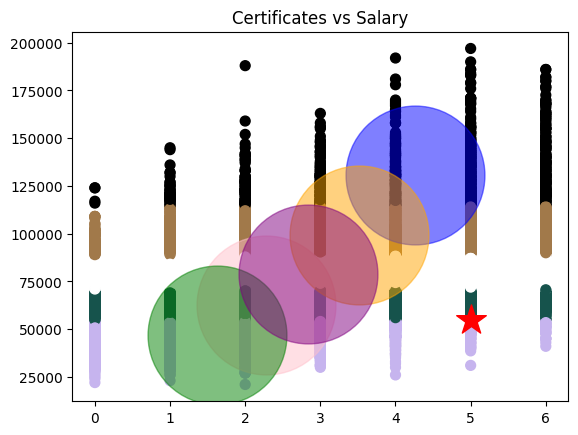

In [ ]:
#Gráfica
plt.scatter(XD[:,3],XD[:,5],c=labels,s=50,cmap='cubehelix')
plt.scatter(XDi[:,3],XDi[:,5],marker='*',s=500,facecolors='red')

#Centroide 1 - Cluster 0
plt.scatter(centroids[0,3],centroids[0,5],marker='o', alpha=0.5,s=10000,facecolors='blue')
#Centroide 2 - Cluster 1
plt.scatter(centroids[1,3],centroids[1,5],marker='o',alpha=0.5,s=10000,facecolors='pink')
#Centroide 3 - Cluster 2
plt.scatter(centroids[2,3],centroids[2,5],marker='o', alpha=0.5,s=10000,facecolors='orange')
#Centroide 4 - Cluster 3
plt.scatter(centroids[3,3],centroids[3,5],marker='o',alpha=0.5,s=10000,facecolors='green')
#Centroide 5 - Cluster 4
plt.scatter(centroids[4,3],centroids[4,5],marker='o',alpha=0.5,s=10000,facecolors='purple')
plt.title('Certificates vs Salary')
plt.show()

6. Pronóstico TechSales_Rep 2

In [ ]:
XDB1=pd.read_excel(nxl,sheet_name=1)
XDB1=XDB1.dropna()
XD1=np.array(XDB1[['Age','Female','Years','Certficates','Feedback','Salary']])

ydn=mar.predict(XD1)

#Informe
dfn1=pd.DataFrame(np.column_stack((XD1,ydn)))
dfn1.columns=['Age','Female','Years','Certficates','Feedback','Salary','Industria']
dfn1.to_excel("InformeIndustrias1.xlsx")

#Pronóstico
h1= sum(dfn1['Industria']==0)
s1= sum(dfn1['Industria']==1)
dfni1=pd.DataFrame({'Tipo de Negocio':['Hardware','Software'],
                                      '# Personas':[h1,s1]})
dfni1.to_excel('Informe#Personas1.xlsx')


Tipo de Negocio  # Personas
0        Hardware          10
1        Software          90

7. Preguntas

1. ¿Cuál es la variable que tiene una mayor correlación con la variable de Pronóstico, sea el valor positivo o negativo? **La edad con una correlación de -0,242 (-24,2%)**

2. Determinar cuáles son las variables que poseen la mayor correlación entre ellas: **Salario y Certificado con una correlación de 0,458**

3. De acuerdo con las métricas de Exactitud y Especificidad determinar el modelo de clasificación que tuvo el mejor comportamiento frente al pronóstico de la Industria a la cual pertenece una persona: **El mejor modelo es el árbol de decisión**
**KNN: Exactitud de 69.29% y una Especificidad de 73.42%.**
**Naive Bayes: Exactitud: 0,62 (62%), Especificidad: 0,77 (77%)**
**Árbol de Decisión: Exactitud: 0,67 (67%), Especificidad: 0,99 (99%)**

4. Llevar a cabo el pronóstico del tipo de negocio al que pertenece una persona de acuerdo con base de datos TechSales_Rep_2 y de acuerdo con el modelo que tuvo el mejor comportamiento frente al pronóstico de la Industria a la cual pertenece una celebridad: **Se encuentra en el informe ""InformeIndustrias1.xlsx"**
**0	Hardware	10**
**1	Software	90**

5. De acuerdo con el mejor modelo identificado anteriormente, crear un informe que permita
evidenciar el número de personas de la base de datos de pronóstico que pertenecen a una determinada Industria (Hardware:0, Software:1).
**Personas pertenecientes a Hardware 2761**
**Personas pertenecientes a Software 19229**
**Esta información se encuentra en el informe llamado 'Informe#Personas.xlsx'**

6. De acuerdo con el modelo Naive Bayes, cual es la industria que posee los salarios más altos. **La industria de Hardware es la que tiene los salarios más altos, con una media de 7.55. ($75.512,45)**

7. De acuerdo con el modelo Naive Bayes, cual es la industria que posee la edad más baja. **La industria que posee la edad más baja es la de Software con una media de 3.90. (39)**

8. Indicar las reglas del negocio que poseen nodos completamente puros en la estructura del árbol de decisión. Tomar una profundidad para el árbol de 4
**En el árbol se encontraron 3 nodos completamente puros, los cuales tienen las siguientes reglas de negocio: **
**a. Nivel 1, Nodo 2, gini= 0.0, muestras= 1885 [1885,0], su regla de negocio es: Age > 57.5**
**b. Nivel 3, Nodo 1, gini=0.0, muestras=851 [0,851], su regla de negocio es: Age <= 57.5, Feedback <= 3.995 y Age <= 23.5.**
**c. Nivel 3, Nodo 3, gini=0.0, muestras= 2 [0,2], su regla de negocio es: Age <= 57.5, Feedback > 3.995 y Age <= 23.5.**

9. Tomando un total de 5 grupos de datos o clusters para el modelo KMeans, y de acuerdo con las variables socioeconómicas que definen a una personalidad ([(26,1,5,5,3,55000)]), determinar a que cluster pertenece. **Una persona con estas datos hará parte del cluster 1**

10. Tomando un total de 5 grupos de datos o clusters para el modelo KMeans, cual es la probabilidad de qué una personalidad con las siguientes variables socioeconómicas ([(26,1,5,5,3,55000)]) pertenezca a la industria del hardware o del software.. **El porcentaje de pertenecer a la Industria Hardware de la persona es: 43.94% y el porcentaje de pertenecer a la Industria Software de la persona es: 56.05%**

11. Determinar la probabilidad de que una personalidad pertenezca a la Industria del Software o del Hardware de acuerdo con los clusters anteriores.
**CLUSTER 0= El porcentaje de pertenecer a la Industria Hardware es: 50.21% y el porcentaje de pertenecer a la Industria Software es: 49.78%.**
**CLUSTER 1= El porcentaje de pertenecer a la Industria Hardware es: 43.94% y el porcentaje de pertenecer a la Industria Software es: 56.05%.**
**CLUSTER 2= El porcentaje de pertenecer a la Industria Hardware es: 48.62% y el porcentaje de pertenecer a la Industria Software es: 51.37%.**
**CLUSTER 3= El porcentaje de pertenecer a la Industria Hardware es: 38.35% y el porcentaje de pertenecer a la Industria Software es: 61.64%.**
**CLUSTER 4= El porcentaje de pertenecer a la Industria Hardware es: 47.31% y el porcentaje de pertenecer a la Industria Software es: 52.68%.**

12. Gráficar la personalidad anterior en los clusters, de acuerdo con las variables que tienen una mayor correlación. **Gráfica "Certificates vs Salary"**